<a href="https://colab.research.google.com/github/fpinto2021/EGN-Statistics-/blob/main/Pinto_Felipe_Alexnet_Load_Slides_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image, size=224):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor



In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 93.5MB/s]


In [4]:
url = "https://docs.google.com/presentation/d/1rWyLFk8HsHbJMz1mUJhdSztC8Hmy7ZLWzsoDqsiGPfU/edit#slide=id.p"

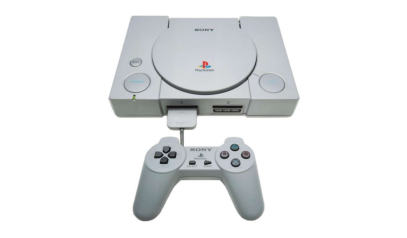

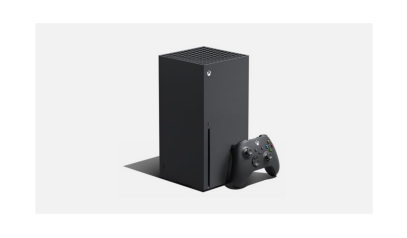

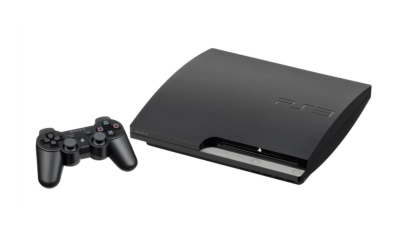

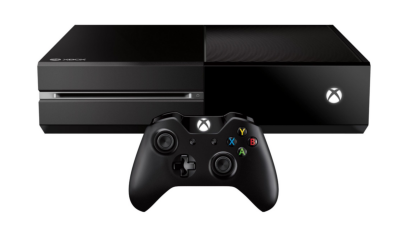

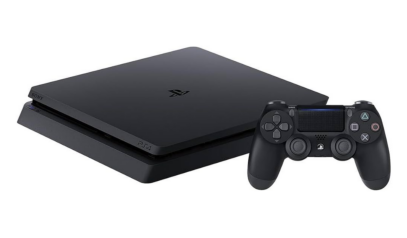

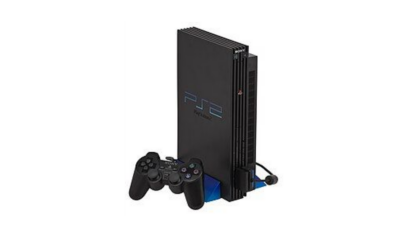

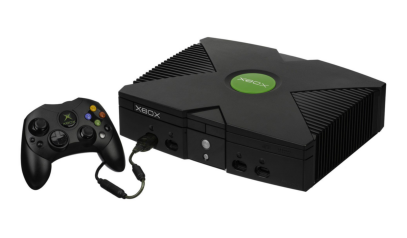

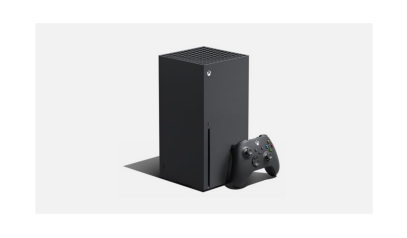

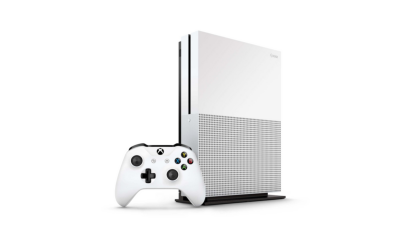

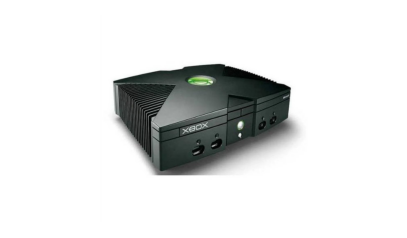

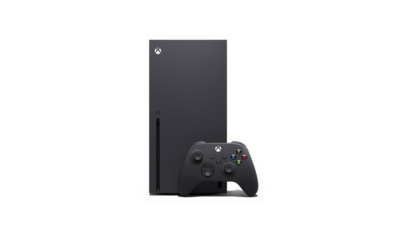

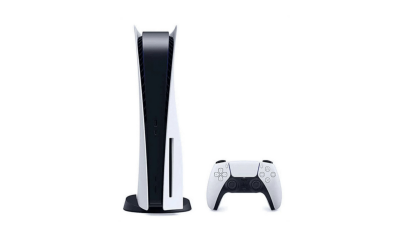

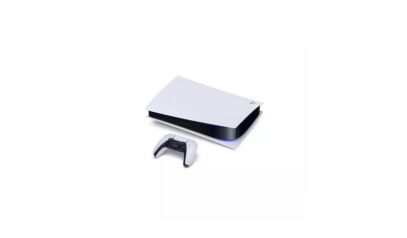

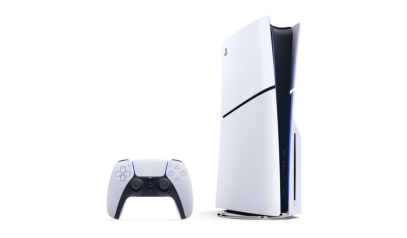

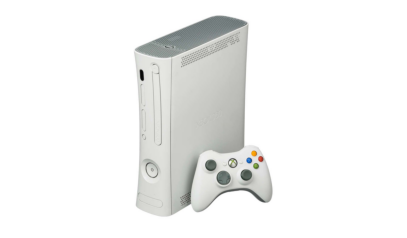

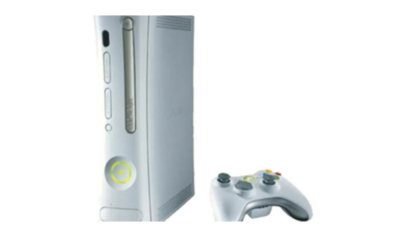

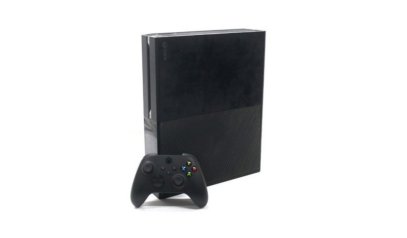

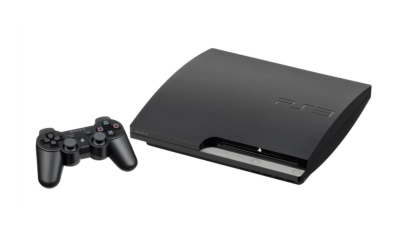

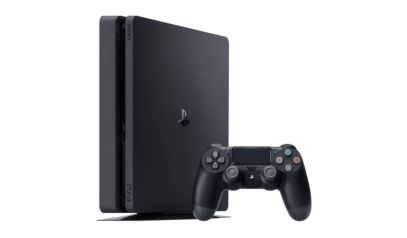

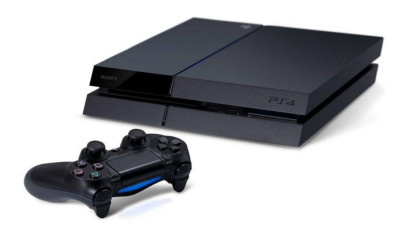

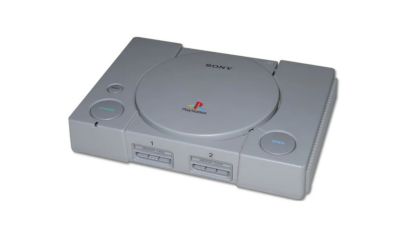

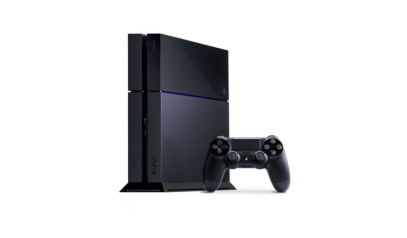

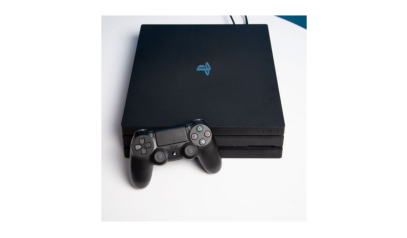

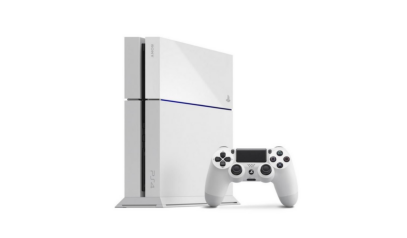

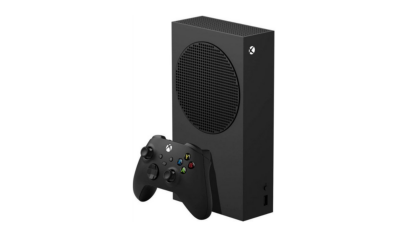

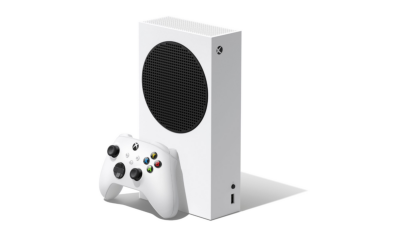

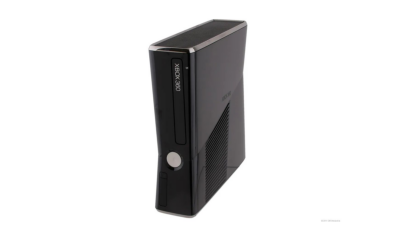

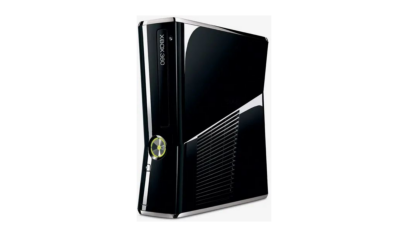

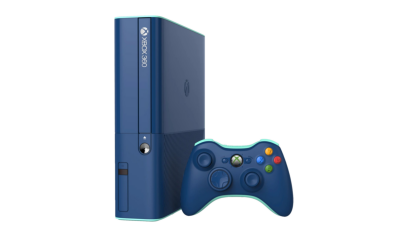

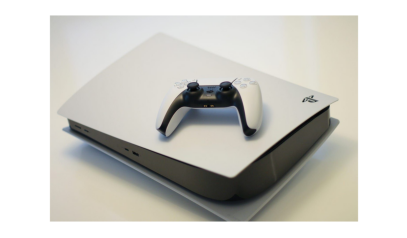

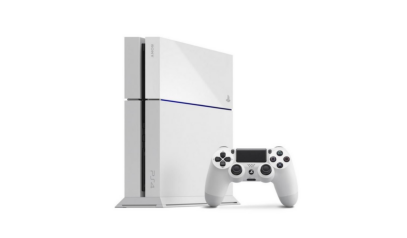

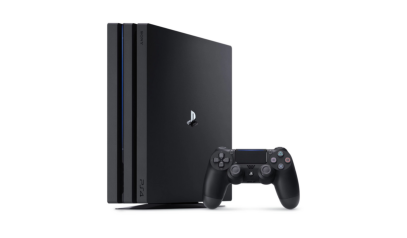

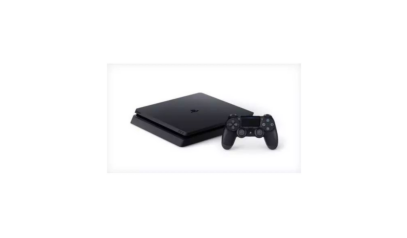

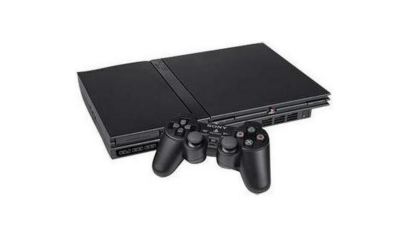

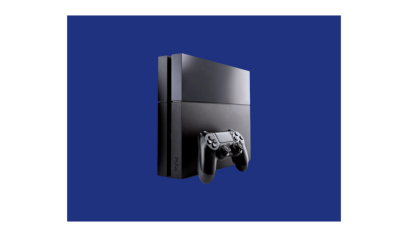

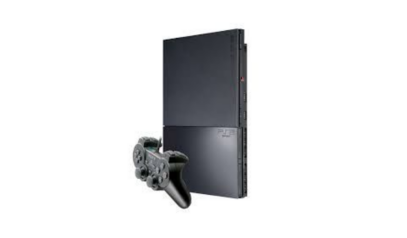

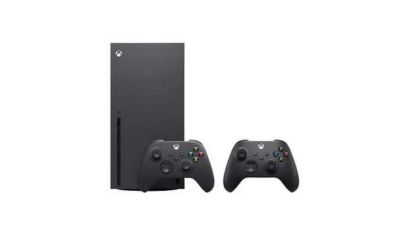

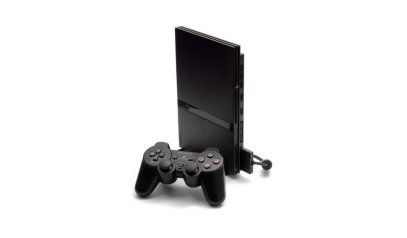

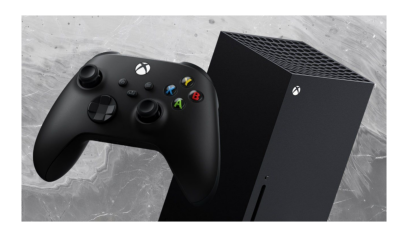

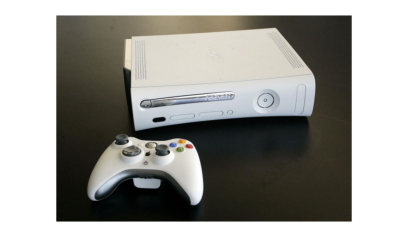

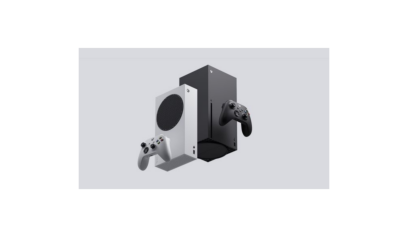

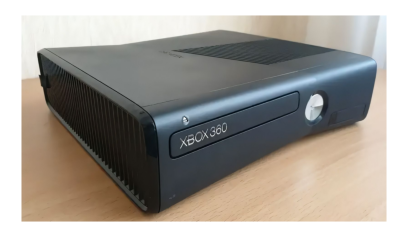

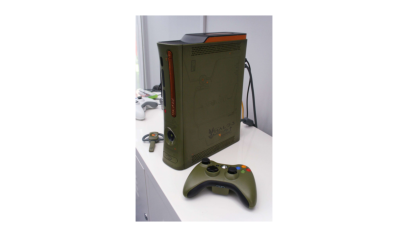

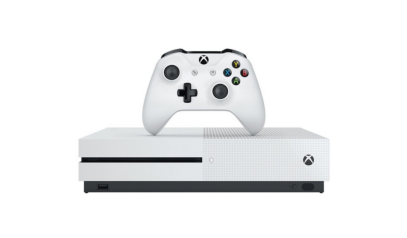

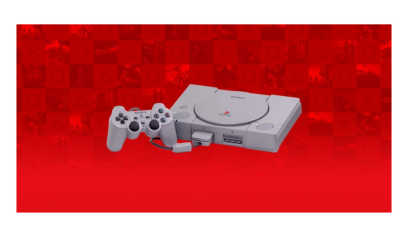

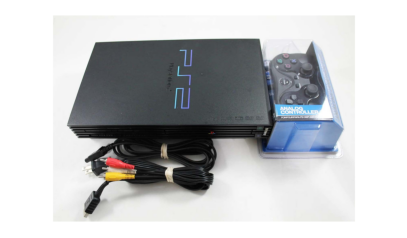

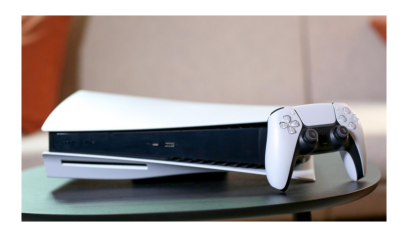

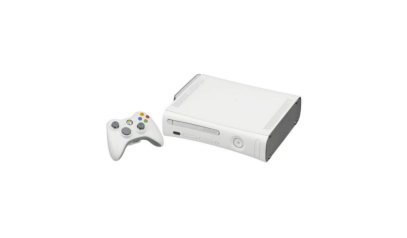

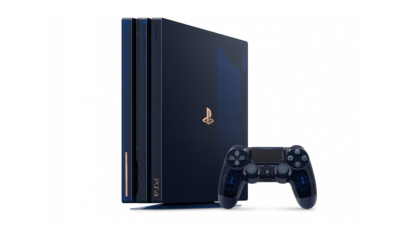

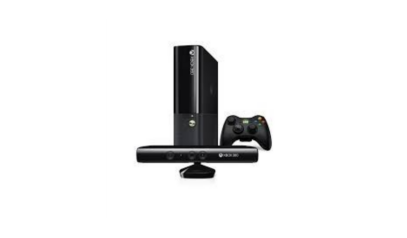

In [5]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [6]:
images.shape

torch.Size([50, 3, 224, 224])

In [7]:
model(images)

tensor([[-5.6589, -5.9827, -4.0911,  ..., -6.9904, -1.7924,  8.5326],
        [-3.5454, -4.6824, -3.0341,  ..., -5.5683, -3.1272,  4.2570],
        [-2.5617, -5.9964, -0.1474,  ..., -4.9526, -0.3707,  3.3852],
        ...,
        [-4.1756, -3.9429,  0.8966,  ..., -7.0752, -0.3091,  7.0934],
        [-2.7963, -6.0702, -5.2839,  ..., -6.2637, -4.4992,  1.0258],
        [-2.0547, -3.8117, -4.1808,  ..., -4.0113, -1.9474,  2.4797]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)

In [9]:
y.shape

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [11]:
for i in list(guesses):
    print(labels[i])

scale, weighing machine
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
radio, wireless
projector
projector
desktop computer
projector
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
radio, wireless
hard disc, hard disk, fixed disk
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
hook, claw
mortarboard
printer
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
safe
monitor
radio, wireless
desktop computer
radio, wireless
CD player
desktop computer
projector
soap dispenser
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
desktop computer
desktop computer
binder, ring-binder
sunglasses, dark glasses, shades
soap dispenser
desktop computer
can opener, tin opener
radio, wireless
switch, electric switch, electrical switch
desktop computer
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
desk

In [12]:
Y = np.zeros(50,)
Y[25:] = 1

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [15]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
X = y.detach().cpu().numpy()

In [17]:
X.shape

(50, 1000)

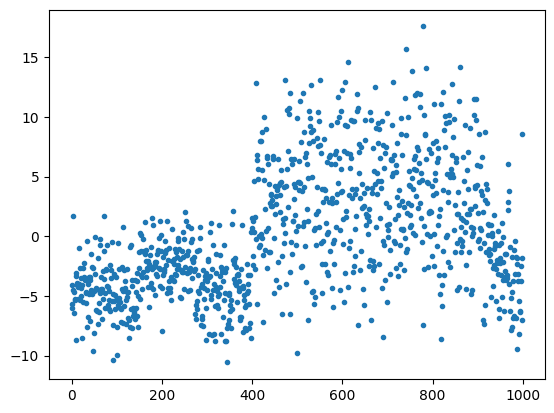

In [18]:
plt.plot(X[0],'.')

(array([ 26., 134., 265., 184., 133., 107.,  81.,  50.,  18.,   2.]),
 array([-10.57176018,  -7.75767136,  -4.94358301,  -2.12949419,
          0.68459433,   3.49868298,   6.3127718 ,   9.12686062,
         11.94094849,  14.75503731,  17.56912613]),
 <BarContainer object of 10 artists>)

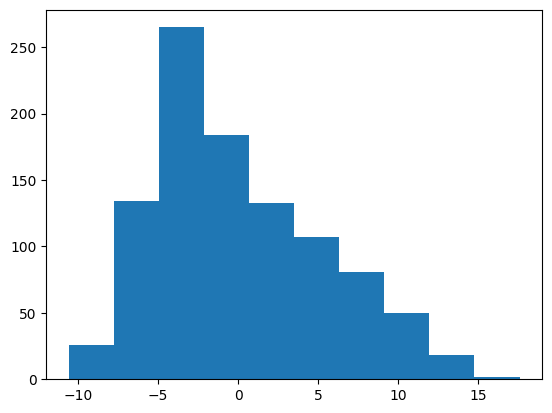

In [19]:
plt.hist(X[0])

In [20]:
X = GPU_data(X)
Y = GPU_data(Y)

In [21]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [22]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [23]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [24]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [25]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [26]:
X.shape

torch.Size([50, 1000])

In [27]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [28]:
def model(x,w):

    return x@w[0]

In [29]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: